# System Framework

This notebook contains graphs for the system framework section

A lot of stuff is copy pasted around, which is mostly just to ensure that modifying a previous plot wont affect later ones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

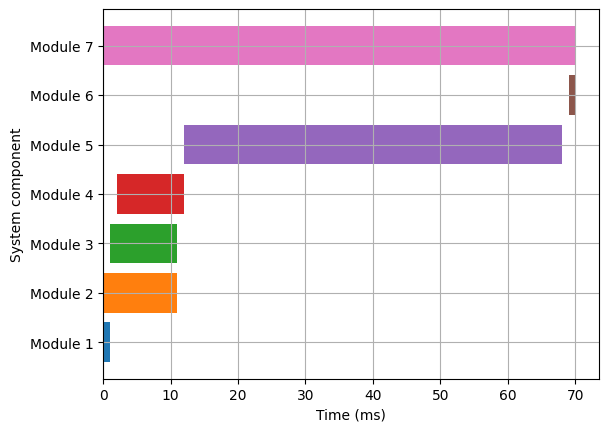

In [66]:
data = pd.read_csv(
    "data/timing-concurrent-demo.csv",
    header=0,
    index_col=["run_id", "name"],
    delimiter=";",
)

fig, ax = plt.subplots()

# Limit to run_id 1 to avoid a massive graph

data = data.loc[10]

total_start = data.time_start.min()

module_id = 1

for i, row in data.iterrows():
    start_time = row.time_start - total_start
    end_time = row.time_end - total_start

    name = i[1]
    # For this graph the module names are not important, and may be distracting
    if name != "frame":
        name = f"Module {module_id}"
        module_id += 1

    ax.barh(name, end_time - start_time, left=start_time)

plt.ylabel("System component")
plt.xlabel("Time (ms)")

plt.grid(True)
plt.show()

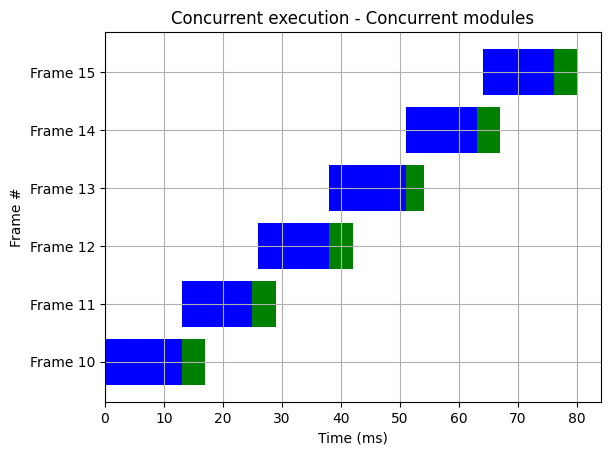

Total time: 80 ms


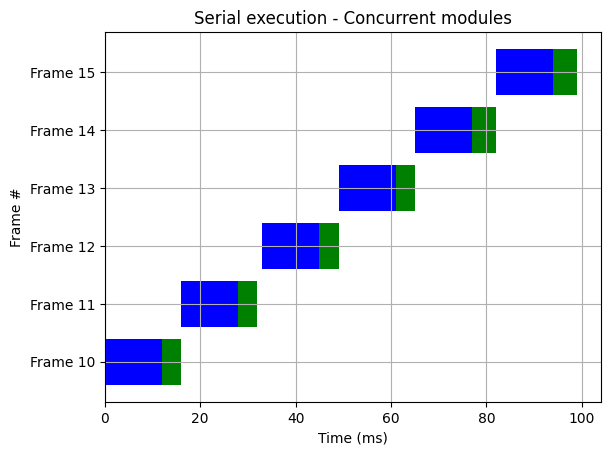

Total time: 99 ms


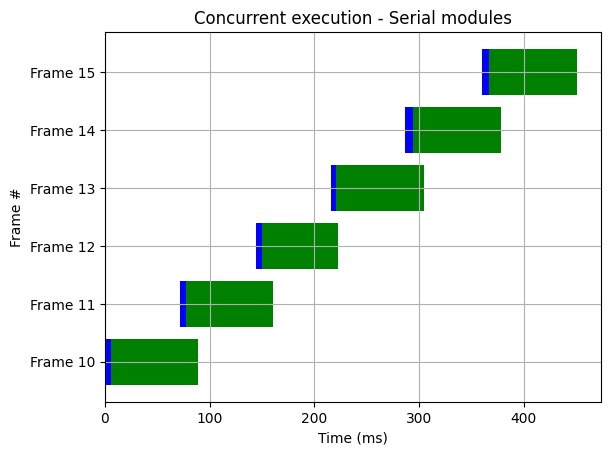

Total time: 451 ms


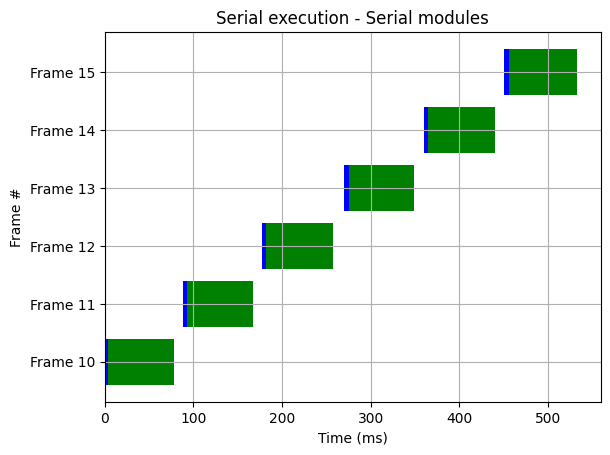

Total time: 533 ms


In [146]:
data_files = [
    (
        "data/timing-concurrent-module-exec-overhead.csv",
        "Concurrent execution - Concurrent modules",
    ),
    (
        "data/timing-wait-module-exec-overhead.csv",
        "Serial execution - Concurrent modules",
    ),
    (
        "data/timing-concurrent-module-exec-blocking.csv",
        "Concurrent execution - Serial modules",
    ),
    ("data/timing-wait-module-exec-blocking.csv", "Serial execution - Serial modules"),
]

for data_file, plot_title in data_files:
    data = pd.read_csv(data_file, header=0, index_col=["run_id", "name"], delimiter=";")
    data.sort_index(level=0, inplace=True)

    fig, ax = plt.subplots()

    ax.set_title(plot_title)

    data = data.loc[slice(10, 15)]

    total_start = data.time_start.min()

    module_id = 1

    for i, row in data.iterrows():
        start_time = row.time_start - total_start
        end_time = row.time_end - total_start

        name = i[1]
        if name != "system":
            continue

        ax.barh(f"Frame {i[0]}", end_time - start_time, left=start_time, color="blue")

    for i, row in data.iterrows():
        start_time = row.time_start - total_start
        end_time = row.time_end - total_start

        name = i[1]
        if name != "frame":
            continue

        ax.barh(f"Frame {i[0]}", end_time - start_time, left=start_time, color="green")

    plt.ylabel("Frame #")
    plt.xlabel("Time (ms)")

    plt.grid(True)
    plt.show()

    total_time = data.time_end.max() - data.time_start.min()
    print(f"Total time: {total_time} ms")

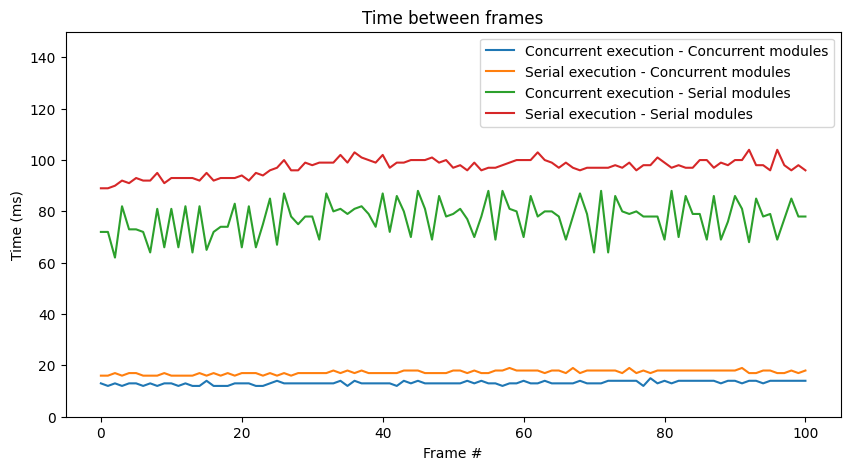

In [126]:
data_files = [
    (
        "data/timing-concurrent-module-exec-overhead.csv",
        "Concurrent execution - Concurrent modules",
    ),
    (
        "data/timing-wait-module-exec-overhead.csv",
        "Serial execution - Concurrent modules",
    ),
    (
        "data/timing-concurrent-module-exec-blocking.csv",
        "Concurrent execution - Serial modules",
    ),
    ("data/timing-wait-module-exec-blocking.csv", "Serial execution - Serial modules"),
]

fig, ax = plt.subplots(figsize=(10, 5))

for data_file, plot_title in data_files:
    data = pd.read_csv(data_file, header=0, index_col=["run_id", "name"], delimiter=";")
    data.sort_index(level=0, inplace=True)

    previous_frame = data.loc[(9, "frame")].time_end

    data = data.loc[(slice(10, 110), "frame"), :]

    points = []

    for i, row in data.iterrows():
        current_time = row.time_end
        time_delta = current_time - previous_frame
        previous_frame = current_time

        points.append(time_delta)

    ax.plot(points, label=plot_title)

ax.set_title("Time between frames")
ax.set_ylim(0, 150)
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Frame #")
ax.legend()

plt.show()

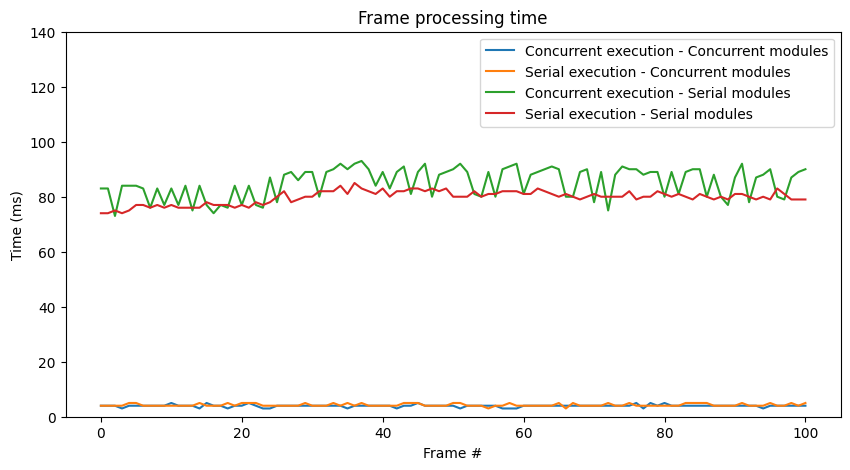

In [150]:
data_files = [
    (
        "data/timing-concurrent-module-exec-overhead.csv",
        "Concurrent execution - Concurrent modules",
    ),
    (
        "data/timing-wait-module-exec-overhead.csv",
        "Serial execution - Concurrent modules",
    ),
    (
        "data/timing-concurrent-module-exec-blocking.csv",
        "Concurrent execution - Serial modules",
    ),
    ("data/timing-wait-module-exec-blocking.csv", "Serial execution - Serial modules"),
]

fig, ax = plt.subplots(figsize=(10, 5))

for data_file, plot_title in data_files:
    data = pd.read_csv(data_file, header=0, index_col=["run_id", "name"], delimiter=";")
    data.sort_index(level=0, inplace=True)

    data = data.loc[(slice(10, 110), "frame"), :]

    points = []

    for i, row in data.iterrows():
        time_delta = row.time_end - row.time_start
        points.append(time_delta)

    ax.plot(points, label=plot_title)

ax.set_title("Frame processing time")
ax.set_ylim(0, 140)
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Frame #")
ax.legend()

plt.show()

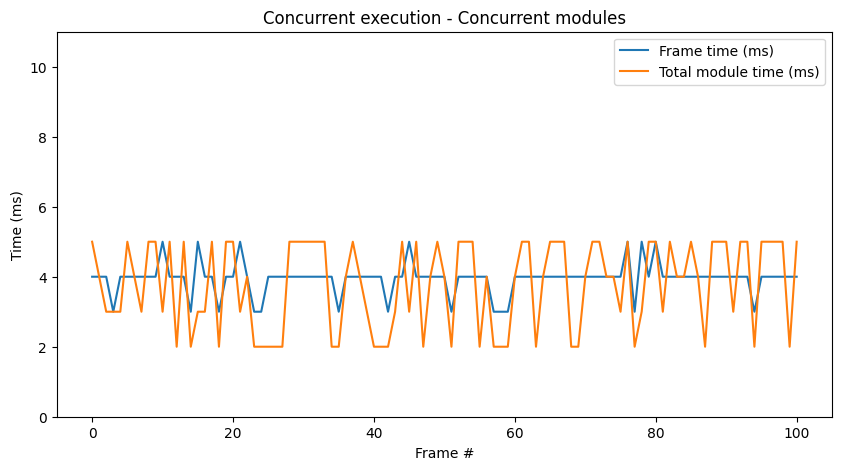

Average savings for Concurrent execution - Concurrent modules: 117.76%


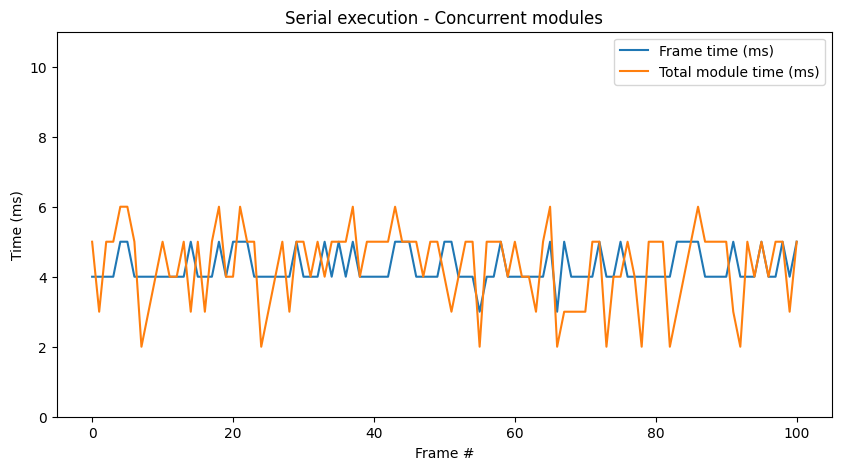

Average savings for Serial execution - Concurrent modules: 105.92%


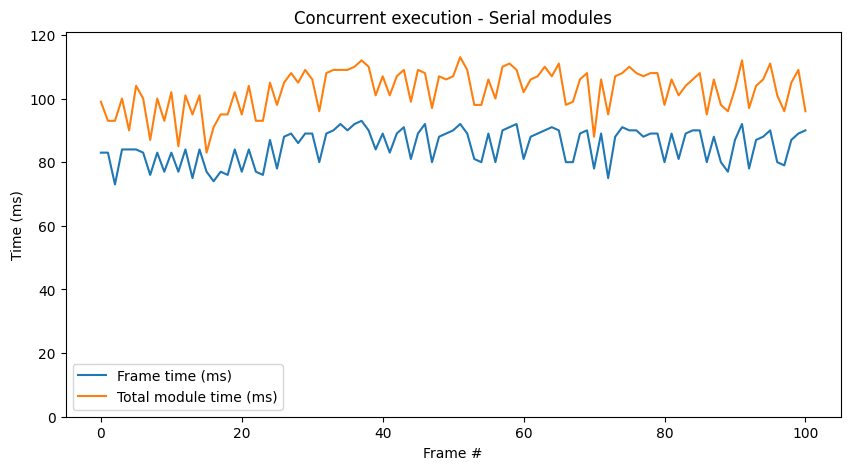

Average savings for Concurrent execution - Serial modules: 82.97%


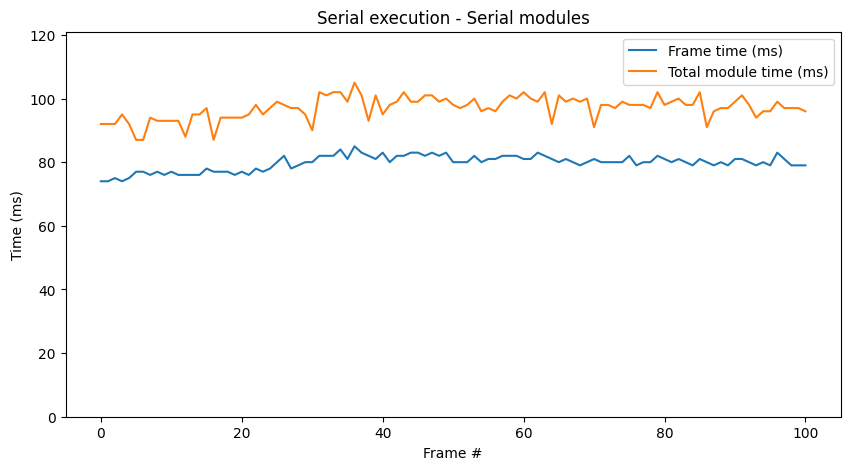

Average savings for Serial execution - Serial modules: 82.24%


In [149]:
data_files = [
    (
        "data/timing-concurrent-module-exec-overhead.csv",
        "Concurrent execution - Concurrent modules",
    ),
    (
        "data/timing-wait-module-exec-overhead.csv",
        "Serial execution - Concurrent modules",
    ),
    (
        "data/timing-concurrent-module-exec-blocking.csv",
        "Concurrent execution - Serial modules",
    ),
    ("data/timing-wait-module-exec-blocking.csv", "Serial execution - Serial modules"),
]


for data_file, plot_title in data_files:
    data = pd.read_csv(data_file, header=0, index_col=["run_id", "name"], delimiter=";")
    data.sort_index(level=0, inplace=True)

    fig, ax = plt.subplots(figsize=(10, 5))

    frame_data = data.loc[slice(10, 110)].groupby("run_id")

    savings = []

    frame_points = []
    module_points = []

    for run_id, group in frame_data:
        module_total = 0
        for i, row in group.iterrows():
            total_time = row.time_end - row.time_start
            if i[1] == "frame":
                frame_points.append(total_time)
            elif i[1] != "system":
                module_total += total_time
        
        module_points.append(module_total)
        savings.append((frame_points[-1] / module_total) * 100)

    maxY = max(module_points)
    
    ax.plot(frame_points, label="Frame time (ms)")
    ax.plot(module_points, label="Total module time (ms)")
    ax.set_ylim(0, round((maxY + 1) / 10) * 11)
    ax.set_title(plot_title)
    ax.set_ylabel("Time (ms)")
    ax.set_xlabel("Frame #")
    ax.legend()

    plt.show()

    average_savings = np.mean(savings)
    print(f"Average savings for {plot_title}: {average_savings:.2f}%")